In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Task5 Unsupervise Learning/synthetic_dataset.csv")
df

,Feature 1,Feature 2,Label
0,-5.155717,-7.934874,2
1,0.594549,1.891727,1
2,7.924583,0.760722,1
3,-3.097360,6.819014,0
4,6.441700,1.361057,1
...,...,...,...
495,-4.780594,-5.493159,2
496,-2.624850,9.526014,0
497,4.136202,4.476702,1
498,-7.663712,-5.306596,2


In [ ]:
df.head()

,Feature 1,Feature 2,Label
0,-5.155717,-7.934874,2
1,0.594549,1.891727,1
2,7.924583,0.760722,1
3,-3.097360,6.819014,0
4,6.441700,1.361057,1


In [ ]:
# Extract features for clustering
X_features = df[['Feature 1', 'Feature 2']]

In [ ]:
# 1. K-Means Clustering (with 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_features)

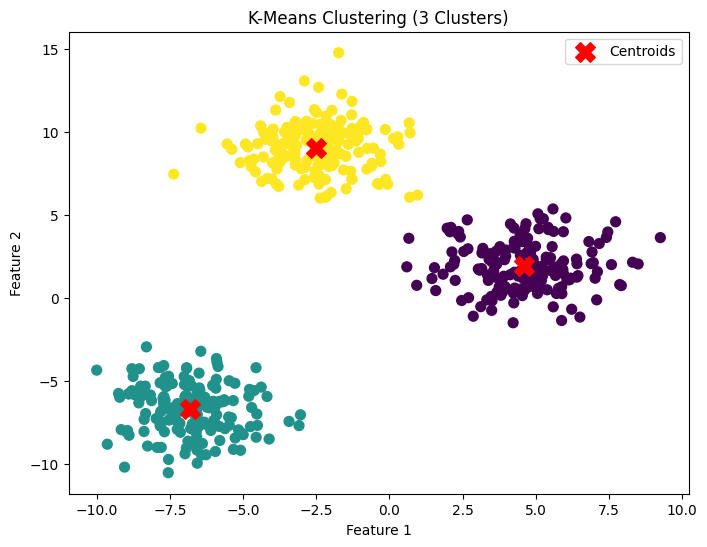

In [ ]:
# Visualize K-Means clustering result
plt.figure(figsize=(8, 6))
plt.scatter(df['Feature 1'], df['Feature 2'], c=df['Cluster'], cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-Means Clustering (3 Clusters)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

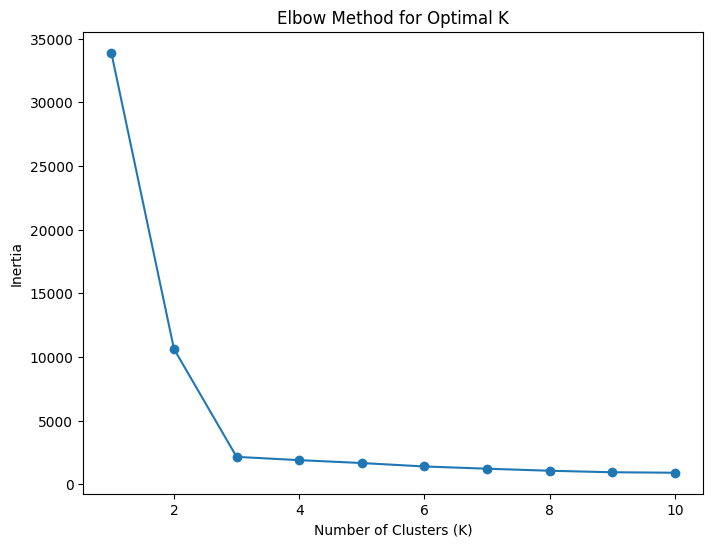

In [ ]:
# 2. Elbow Method to determine optimal clusters
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans_temp = KMeans(n_clusters=k, random_state=42).fit(X_features)
    inertia.append(kmeans_temp.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

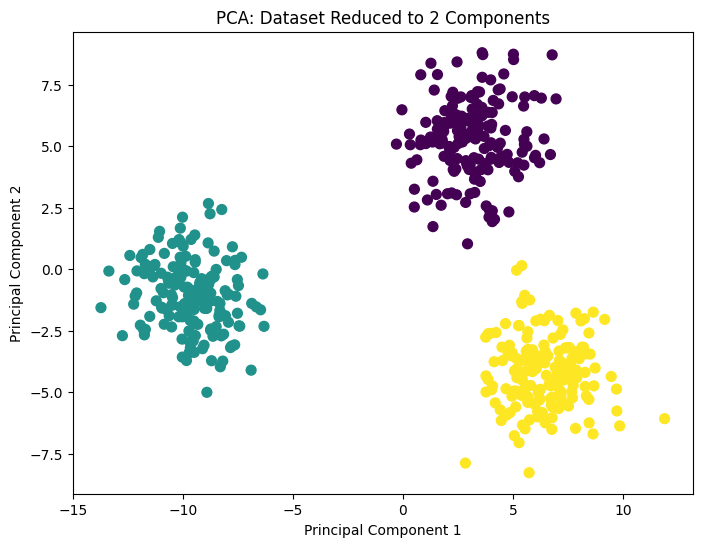

In [ ]:
# 3. PCA for dimensionality reduction (to 2 components)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_features)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis', s=50)
plt.title('PCA: Dataset Reduced to 2 Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
